## <font color = red> Please fill up the asked information!
    
<font color = teal>Name: Omar Nasri

<font color = teal>Student number: 1800794

<font color = teal>Mail: obnasr@utu.fi

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does.
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- <b>A complete submission includes a working notebook</b>, so it's highly recommended to run "Restart & Run all" before the final save. Remember to submit BOTH versions of the exercise (ipynb AND html/pdf). 
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
    - Passing requires that <b>the parts 1-5</b> are completed.
    - +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. Always give the credit where it belongs so please <b>cite your sources, whether you're referencing text or code</b>. You will learn so much more when you have to research and summarize information in your own words. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via email (tuhlei@utu.fi).
- Note! Don't leave it to the last moment! No feedback service during weekends.
- <b>We do not encourage the use of ChatGPT or similar models</b>, but if you choose to do so, always be critical of the outputs and try to comprehend them before any use. Also, make a brief description how you utilized the model (what was your input and how did you benefit from the output).


<font color = green> The guided exercise session is held on the 28th of November at 14:15-16:00, at TSE Elovena-Sali.</font>

<font color = red size = 4><b>The deadline is the 30th of November at 23:59</b></font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### Gather all packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [79]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier


# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your student id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*


In [80]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

# Convert the gender variable to binary (0 and 1) as it may cause some distortion in the knn calculation
cardio_data['gender'] = cardio_data['gender'] - 1


In [81]:
### Code - Resample and print 15 rows
cardio_data_resampled = cardio_data.sample(n=1500, random_state=1800794)

#re-index the data
cardio_data_resampled = cardio_data_resampled.reset_index(drop=True)

display(cardio_data_resampled.head(15)) 

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
0,46,0,160,75.0,130,70,0,0,0,0,1,0,0,1,0,0
1,58,0,165,67.0,120,80,0,0,1,0,1,0,0,1,0,0
2,49,1,165,66.0,123,74,0,0,1,1,0,1,0,1,0,0
3,49,0,171,57.0,110,70,0,0,1,0,1,0,0,1,0,0
4,61,0,162,68.0,140,90,0,0,1,1,0,0,1,0,0,1
5,41,1,184,70.0,120,80,0,0,1,0,0,1,0,1,0,0
6,57,0,172,87.0,120,80,0,0,1,0,1,0,0,1,0,0
7,61,1,164,72.0,130,90,0,0,0,1,0,1,0,1,0,0
8,51,0,167,58.0,90,60,0,0,0,0,1,0,0,1,0,0
9,50,0,168,72.0,130,80,0,0,1,1,1,0,0,1,0,0


----

We have the data so now, let's put it to use. 

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [82]:
### Code - Train-test split
features = cardio_data_resampled.drop(columns=['cardio'])
labels = cardio_data_resampled['cardio']

#Stratify and create a test set of 20% of the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state = 1)

<font color = lightcoral> \<Write your answer here\></font>

The data must be stratified to ensure that the training and test sets both have same proportions of cardiovascular disease cases and non-cases.

----------

**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [83]:
# Standardize numerical features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


<font color = lightcoral> \<Write your answer here\></font>

As the k-NN is a distance based algorithm, features with larger scales would have bigger impact on the distance calculations than ones with smaller. Height for example would have a significant impact on the distance as it has larger values than other features. 

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

In [84]:
### Code - the kNN classifier

# Create the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# predict the test set
y_pred = knn_classifier.predict(X_test)

# print confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

# Use the confusion matrix to calculate accuracy, precision and recall
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
precision = (matrix[1][1]) / (matrix[0][1] + matrix[1][1])
recall = (matrix[1][1]) / (matrix[1][0] + matrix[1][1])

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)


[[174  40]
 [ 67  19]]
Accuracy:  0.6433333333333333
Precision:  0.3220338983050847
Recall:  0.22093023255813954


<font color = lightcoral> \<Write your answer here\></font>

1. The first cell represents the amount of true negatives predicted, second represents the false positives predicted, the third represents the false negatives and fourth true positives predicted.
2. The overall accuracy of the model is 64% and a precision of 32 %. This indicates that the model has a quite high number of false positives. Recall is 22 % which indicates that the model is not very effective in identifyiing all the positives. The difference might come from large difference in observations of each class as there are 214 negative cases and only 86 positive.
3. You should be cautious because, if there is a large imbalance between the classes, accuracy alone might not be a good measure of the model. 

---------------

You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

*Tip: You can add the accuracy from the previous exercise in the plot by drawing a vertical line with the function `matplotlib.axes.Axes.axvline(<accuracy>)` if you want!*

In [85]:
### Code - Initialization of the 1000 fixed seeds
seed = 1234
np.random.seed(seed)
random_seeds = np.random.randint(1, 10000, 1000)

Text(0.5, 1.0, 'Histogram of accuracies')

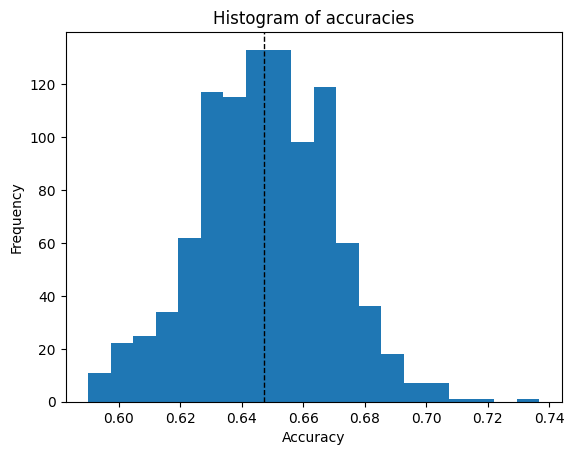

In [86]:
### Code - 1000 different train-test-splits
accuracies = []

#standardize numerical in the whole features subset
scaler = StandardScaler()
scaler.fit(features[numerical_features])
features_standardized = scaler.transform(features[numerical_features])

for seed in random_seeds:
    X_train, X_test, y_train, y_test = train_test_split(features_standardized, labels, test_size=0.2, stratify=labels, random_state = seed)
    #knn
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.hist(accuracies, bins=20)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
#Mean line
plt.axvline(np.mean(accuracies), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of accuracies")


<font color = lightcoral> \<Write your answer here\></font>

The histogram data of accuracies seem to be normalized(ish), with the both median and mean being about 65%. This result is fairly similar than we got with the previous accuracy calculation with the test set. 

------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.) 

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)** 

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?

*Tip: You should not use the predicted labels in this exercise.*

AUC:  0.5706911540969355


Text(0.5, 1.0, 'ROC Curve')

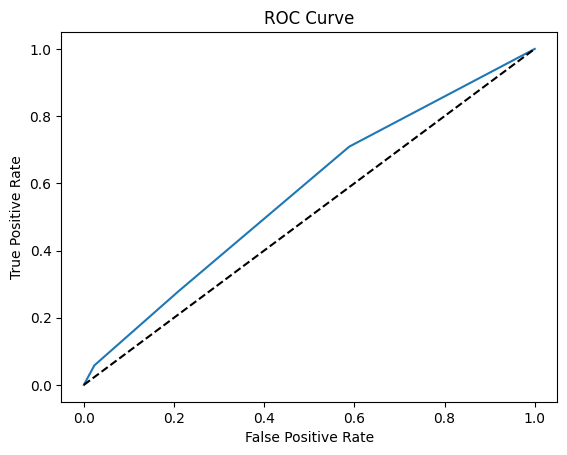

In [87]:
### Code - ROC curve and AUROC

#Predict the probabilities for positive class
y_pred_proba = knn_classifier.predict_proba(X_test)[:,1]

print("AUC: ", metrics.roc_auc_score(y_test, y_pred_proba))

# Plotting
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

<font color = lightcoral> \<Write your answer here\></font>

From the plot we can see that the model does perform better than random guessing, which would be 50 % in accuracy. With a AUC value of about 0.57 we can conclude that the model does show some ability in distinguishing the different classes but its performance is not very strong. 

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [88]:
cross_val_scores = cross_val_score(knn_classifier, features_standardized, labels, cv=LeaveOneOut())
print("Mean accuracy: ", cross_val_scores.mean())

Mean accuracy:  0.6446666666666667


<font color = royalblue> \<Write your answer here\></font>

1. The mean accuracy value is significantly smaller than the one we detected when creating the test set with 1000 random seeds. 
2. Whether we should use the k-NN model depends on what we expect from this model. If our goal is to create a simple and easily interpretable model, k-NN is a good choice. However, if our emphasis is on maximizing the performance of the model, we might want to consider changing the model, as it is likely that we can achieve better results with different approaches. 

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [89]:
### Code - Select best model

accuracies_kNN = []
for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cross_val_scores = cross_val_score(knn_classifier, features_standardized, labels, cv=LeaveOneOut())
    accuracies_kNN.append(cross_val_scores.mean())

In [90]:
print("Best accuracy:", max(accuracies_kNN), "and k: ", accuracies_kNN.index(max(accuracies_kNN))+1)

Best accuracy: 0.7133333333333334 and k:  20


Text(0.5, 1.0, 'Accuracy with K value')

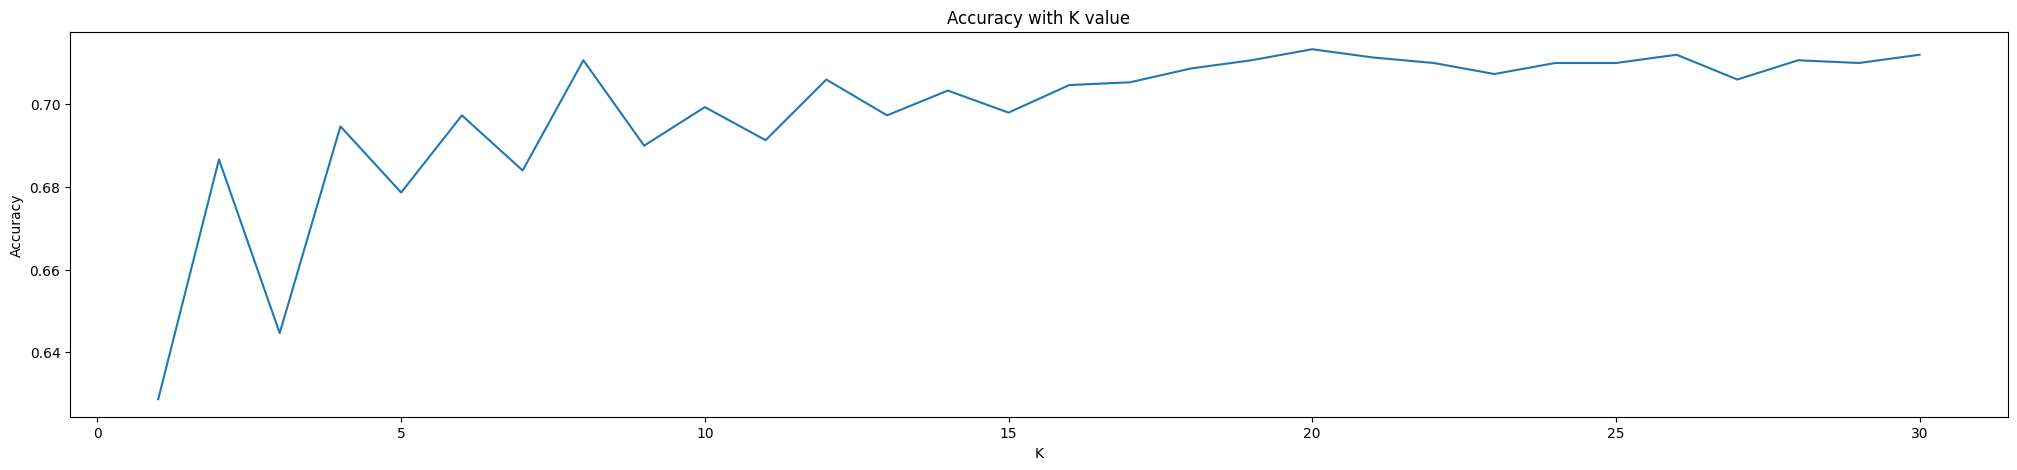

In [91]:
### Code - Plot the accuracies vs. the values for k 

plt.figure(figsize=(25,5))
plt.plot(range(1,31), accuracies_kNN)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy with K value")


<font color = green>\<Write your answer here\></font>

1. We get the best accuracy (71 %) when k= 20. This is a significant increase from the 64 % we got from K = 3. 
2. When looking at the graph we notice that the growth in accuracy is already starting to settle in the 70-72 % region. When we increase the K values further the model will most likely start to behave like a simple model and underfit, leading to decrease in accuracy. 70-72 % region seems to be the max accuracy achievable with this model by only editing the K-value hyperparameter. 
3. When choosing a low K-value the model will be more sensitive to noise and outliers in the data. Very high K-value will lead to underfitting when the model is too simplified. 

________________
## <font color = red>  4. Training and testing on the same dataset </font>

<i>Note that this should never be done outside of this exercise! You have been warned.</i>

Oh, but what if we just trained a model using the *entire* dataset? Wouldn't we like to use as much data as possible to discover the underlying patterns in the data so why not to use all of it?

**Exercise 4**

This is quite straightforward: Train 30 k-NN models ($k = 1...30$ ) using the whole dataset and evaluate the trained models using, again, the whole dataset. Create a plot that displays the accuracies against the corresponding k values. Include the accuracy values from the previous task in the same figure.

- What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?
- Explain why you should never use the same dataset for training and testing.

In [92]:
### Code - Train with whole data

accuracies_same = []
for i in range (1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(features_standardized, labels)
    y_pred = knn_classifier.predict(features_standardized)
    accuracy = metrics.accuracy_score(labels, y_pred)
    accuracies_same.append(accuracy)

Best accuracy: 0.9946666666666667 and k:  1


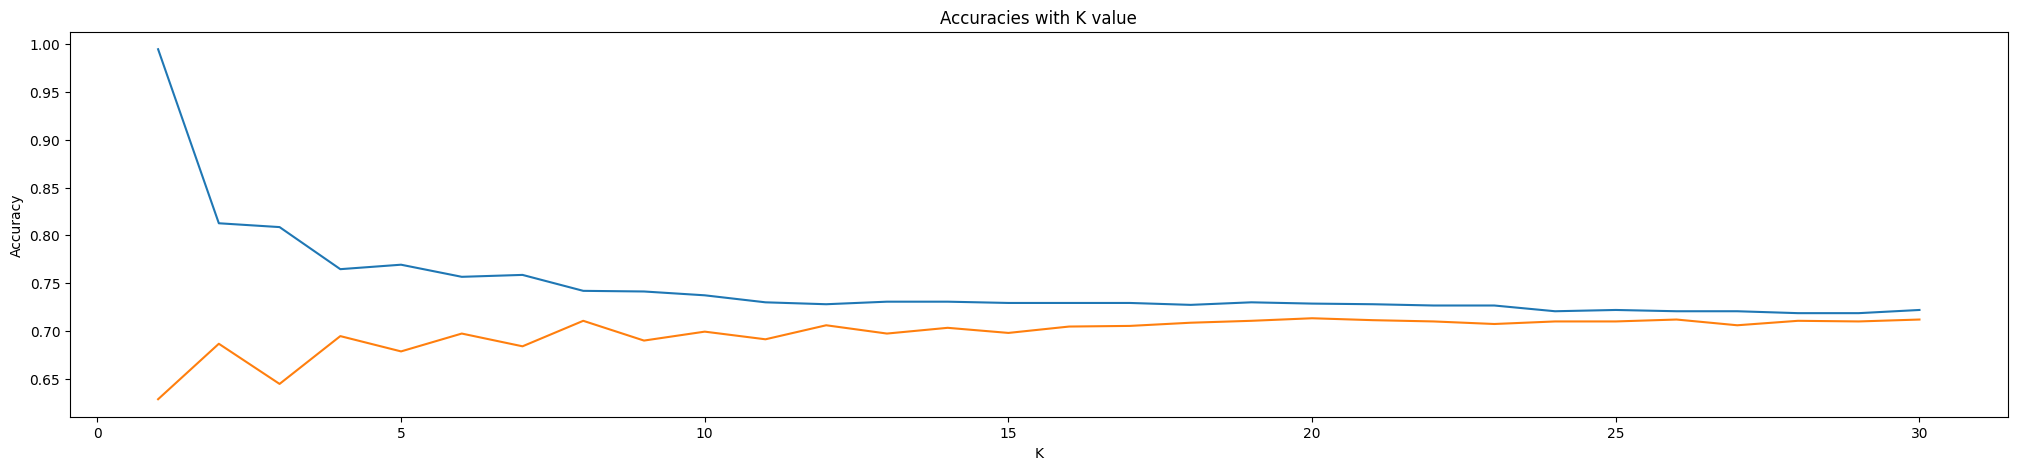

In [93]:
### Code - Plot results

plt.figure(figsize=(25,5))
plt.plot(range(1,31), accuracies_same)
plt.plot(range(1,31), accuracies_kNN)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracies with K value")


print("Best accuracy:", max(accuracies_same), "and k: ", accuracies_same.index(max(accuracies_same))+1)

<font color = red>\<Write your answer here\></font>

 Now the best value is close to 1 with K = 1. Since the model is trained with the data, the model has just memorized each point. This obviously only works for this dataset and if we data that is outside the dataset, it will perform very poorly. This is the reason why you should never use same dataset for testing and training as the goal of machine learning models are to generalize to new unseen data. 

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length 
- <b>len_earconch</b>: Ear conch length 
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [94]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

In [95]:
possum_data.head()

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,60.4,54.5,15.2,74.5,36.0,28.0,36.0,89.0
1,1,6.0,92.5,57.6,51.2,16.0,72.5,36.5,28.5,33.0,91.5
2,1,6.0,94.0,60.0,51.9,15.5,75.4,39.0,30.0,34.0,95.5
3,1,6.0,93.2,57.1,52.2,15.2,76.1,38.0,28.0,34.0,92.0
4,1,2.0,91.5,56.3,53.2,15.1,71.0,36.0,28.5,33.0,85.5


-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

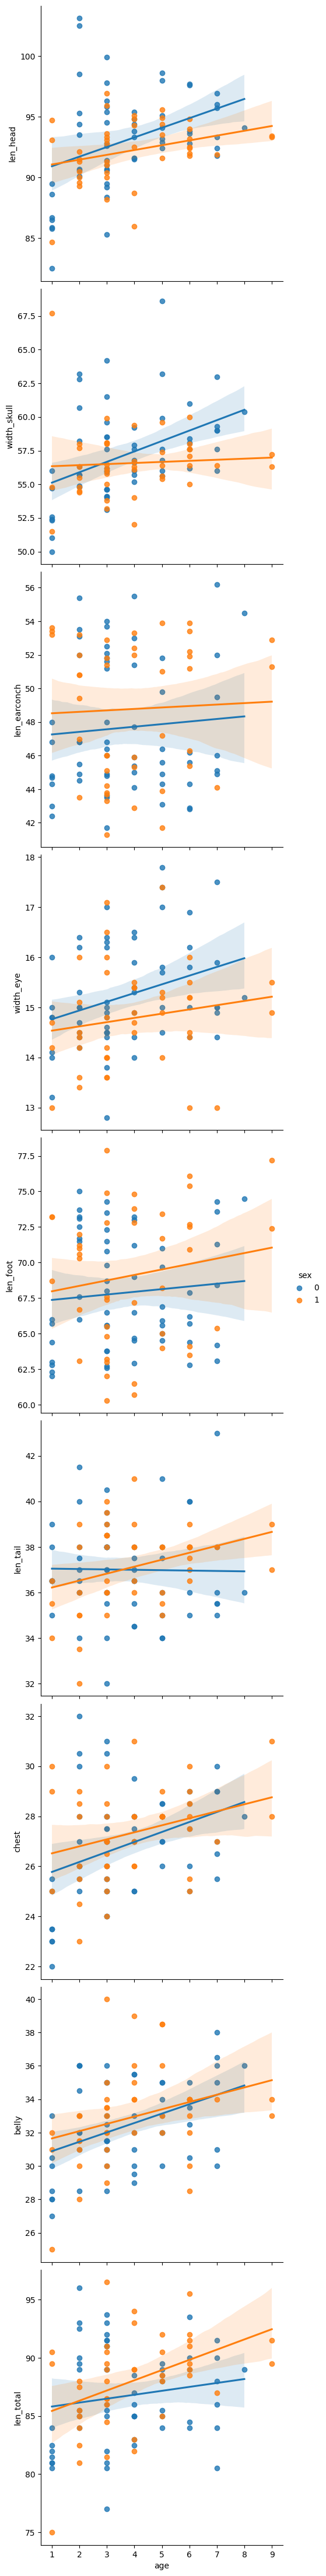

In [96]:

### Code - Pairplot
columns = ["len_head", "width_skull", "len_earconch", "width_eye", "len_foot", "len_tail", "chest", "belly", "len_total"]
sns.pairplot(possum_data, x_vars=['age'], y_vars=columns, kind='reg', hue="sex", height=5)

<font color = darkorange>\<Write your answer here\> 

1. Chest and belly seem to be the most positively correlated with bot male and female genders. Earconch length seems to show almost no correlation with both genders. 
2. There are clear when looking at the regression lines differences between male and female genders.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

In [97]:
#Train-test split 
features = possum_data.drop(columns=['age'])
labels = possum_data['age']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 1)

# Standardize the data except for the categorical sex column
numerical_features_possum = ['len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 'len_tail', 'chest', 'belly', 'len_total']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features_possum])
X_train[numerical_features_possum] = scaler.transform(X_train[numerical_features_possum])
X_test[numerical_features_possum] = scaler.transform(X_test[numerical_features_possum])


<font color = darkorange>\<Write your answer here\></font>

We need to standardize the data for the same reasons as we did with the kNN model. 

------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

Lowest MAE for ridge:  1.5226247518881637 with i value of:  7
Lowest MAE for kNN:  1.4875 with k value of:  7


Text(0.5, 1.0, 'k-NN regression')

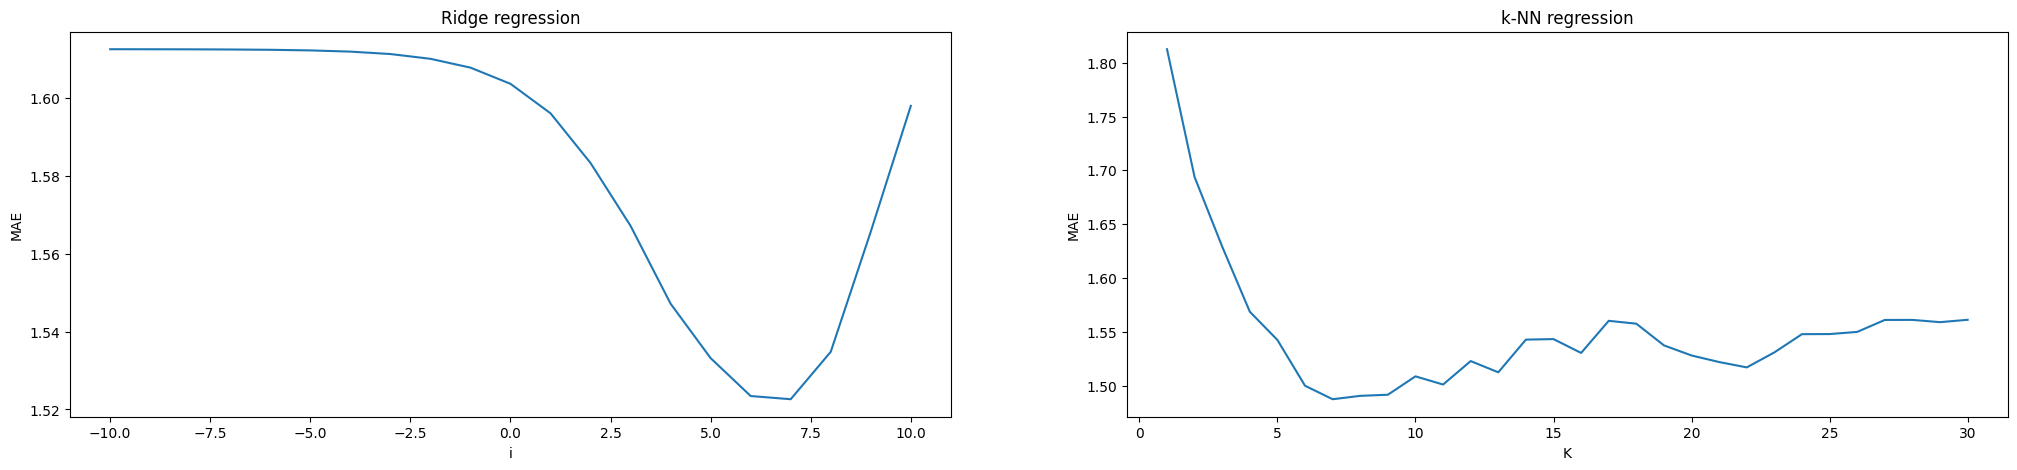

In [98]:
#Ridge regression
ridge_accuracies = []
for i in range(-10, 11):
    ridge = Ridge(alpha=2**i)
    cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
    ridge_accuracies.append(cross_val_scores.mean())

#Convert to positive values
ridge_accuracies = [-x for x in ridge_accuracies] 
print("Lowest MAE for ridge: ", (min(ridge_accuracies)), "with i value of: ", ridge_accuracies.index(min(ridge_accuracies))-10)

#k-NN regression
knnR_accuracies = []
for i in range(1, 31):
    knnR = KNeighborsRegressor(n_neighbors=i)
    cross_val_scores = cross_val_score(knnR, X_train, y_train, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
    knnR_accuracies.append(cross_val_scores.mean())

#Convert to positive values
knnR_accuracies = [-x for x in knnR_accuracies]
print("Lowest MAE for kNN: ", (min(knnR_accuracies)), "with k value of: ", knnR_accuracies.index(min(knnR_accuracies))+1)

#Plotting
fig, axes = plt.subplots(1,2, figsize = (25,5))
axes[0].plot(range(-10,11), ridge_accuracies)
axes[0].set_xlabel("i")
axes[0].set_ylabel("MAE")
axes[0].set_title("Ridge regression")

axes[1].plot(range(1,31), knnR_accuracies)
axes[1].set_xlabel("K")
axes[1].set_ylabel("MAE")
axes[1].set_title("k-NN regression")


<font color = darkorange>\<Write your answer here\></font>

The MAE means that both model predictions are off by about 1.5 years on average. 

------

The cross-validation was employed for model selection and at this point, we have the optimal hyperparameter settings for each model. Let's finally assess both models using the test set. To continue from this, we first fit the chosen models using the entire training, ensuring that the models are trained with the maximum available data. 

**Exercise 5 D)**

Fit the chosen models with the whole training set. Evaluate the models using the test set and describe the results.

- How well did the models perform in estimating the possums' ages?
- So, what's the pitfall in here if you had compared the overall performance of the models based on the cross-validation MAEs and not the MAEs for the test set?

In [99]:
## Code - Evaluating the selected models

#Ridge regression
ridge = Ridge(alpha=2**7)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
MAE_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
print("Ridge regression MAE: ", MAE_ridge)

#k-NN regression
knnR = KNeighborsRegressor(n_neighbors=7)
knnR.fit(X_train, y_train)
y_pred_knnR = knnR.predict(X_test)
MAE_knnR = metrics.mean_absolute_error(y_test, y_pred_knnR)
print("kNN regression MAE: ", MAE_knnR)


Ridge regression MAE:  1.3755983295038725
kNN regression MAE:  1.360544217687075


<font color = darkorange>\<Write your answer here\></font>

1. Both models performed similarly with a Mean Absolute Error (MAE) of around 1.4 years, which is relatively high. However, considering the simplicity of these models and the small size of the dataset, it could be argued that the models are performing reasonably well.
2. The potential pitfall lies in the risk of the model learning patterns specific to the training set, leading to good cross validation results that may not necessarily translate to good generalization performance to new data. 

________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and WHY you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>four [4] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you may choose your weapon from the three categories: filter methods, embedded methods or wrapper methods. Use <font color = slategrey>two methods from two different category and compare their outputs</font>. Bonus material about the methods is provided in Moodle.

Evaluate the model of your choice with the limited dataset by examining the confusion matrix and computing the accuracy and the AUROC.

**Discuss** your findings and results.

In [100]:
# split the data into training and test sets
features = cardio_data.drop(columns=['cardio'])
target = cardio_data['cardio'] 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 1, stratify=target)

# standardize the numerical features
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#1st feature selection anova F-Test 
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X_train, y_train)
selected_features = selector.get_support(indices=True)

print("Selected features anova F-test: ", features.columns[selected_features])

#2nd feature selection random forest 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)
importances = list(zip(rf_classifier.feature_importances_, features.columns))
importances.sort(reverse=True)

print("Selected features random forest: ", importances[:4])

Selected features anova F-test:  Index(['age', 'weight', 'cholesterol_normal', 'cholesterol_high'], dtype='object')
Selected features random forest:  [(0.20968232165086817, 'weight'), (0.18784335895866844, 'height'), (0.18681924804256206, 'ap_hi'), (0.17923380785317358, 'age')]


[[784  56]
 [291  69]]
Accuracy anova F-test:  0.7108333333333333
AUC anova F-test:  0.6605489417989417
[[805  35]
 [314  46]]
Accuracy random forest:  0.7091666666666666
AUC random forest:  0.6756431878306879


Text(0.5, 1.0, 'ROC Curve random forest')

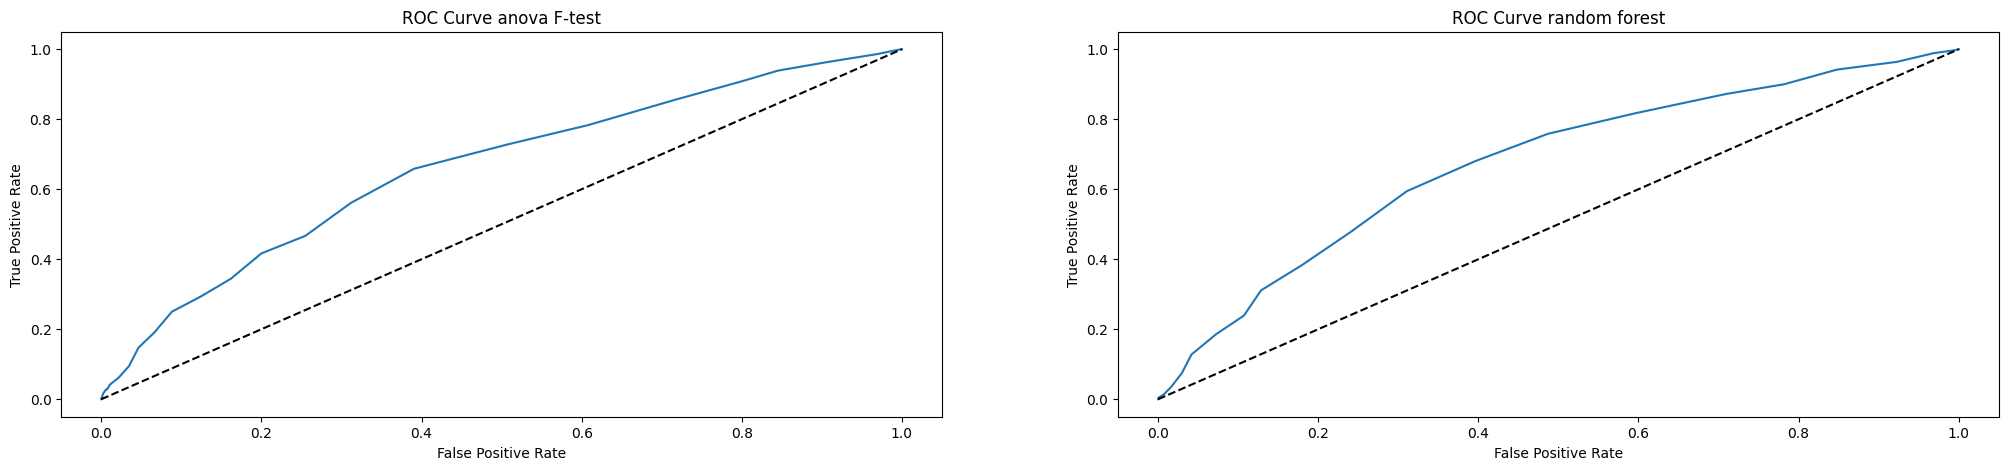

In [101]:
#test the performance of the models

F_test_features = features[['age', 'weight', 'cholesterol_normal', 'cholesterol_high']]
rf_features = features[['age', 'weight', 'ap_hi', 'height']]

#Anova F-test features
X_train, X_test, y_train, y_test = train_test_split(F_test_features, target, test_size=0.2, random_state = 1, stratify=target)
#standardize numerical features
numerical_features_F = ['age', 'weight']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features_F])
X_train[numerical_features_F] = scaler.transform(X_train[numerical_features_F])
X_test[numerical_features_F] = scaler.transform(X_test[numerical_features_F])

knn_classifier = KNeighborsClassifier(n_neighbors=30)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))
#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy anova F-test: ", accuracy)
#Auroc
y_pred_proba = knn_classifier.predict_proba(X_test)[:,1]
print("AUC anova F-test: ", metrics.roc_auc_score(y_test, y_pred_proba))
fpr_F, tpr_F, thresholds_F = metrics.roc_curve(y_test, y_pred_proba)



#Random forest features
X_train, X_test, y_train, y_test = train_test_split(rf_features, target, test_size=0.2, random_state = 1, stratify=target)
# standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=30)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))
#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy random forest: ", accuracy)
#Auroc
y_pred_proba = knn_classifier.predict_proba(X_test)[:,1]
print("AUC random forest: ", metrics.roc_auc_score(y_test, y_pred_proba))
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_pred_proba)


#Plot the roc curves
fig, axes = plt.subplots(1,2, figsize = (25,5))
axes[0].plot(fpr_F, tpr_F)
axes[0].plot([0,1],[0,1],'k--')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve anova F-test")

axes[1].plot(fpr_rf, tpr_rf)
axes[1].plot([0,1],[0,1],'k--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve random forest")


<font color = slategrey>\<Write your answer here\></font>

I began this exercise by studying literature and attempting to find the most relevant feature selection methods for this type of data. After research, I selected the ANOVA F-test (filtering) and Random Forest (embedded) as feature selection methods, as both demonstrated promising results in studies with similar data used for predicting cardiovascular diseases.

I divided the data into training and testing sets and standardized it accordingly. Next I created the feature selection models and extracted the selected features from each model. I then generated separate datasets for both feature selection techniques, each containing the corresponding features.

After standardizing the data once again, I employed the KNN model with 3 neighbors as an initial value. I predicted the values for the test set and generated the confusion matrix, accuracy calculation, and AUROC (Area Under the Receiver Operating Characteristic) value. Additionally, I plotted ROC curves for visualization purposes. In order to get the models to perform optimally, after some testing I set the KNN value for both models to be 30. 

<b> Analysis </b>

The models seem to perform quite evenly. Both models seem to have a quite high amount of false negatives (314 and 291) as well as false positives (56 and 35). If we look at the features that the methods chose, the F-test could have performed slightly better if we had calculated the BMI values into the dataset. This is because the weight feature alone may not be that meaningful information without the corresponding height observations.

References:

https://www.sciencedirect.com/science/article/pii/S2772442522000235

https://ieeexplore.ieee.org/abstract/document/8667106